# Set Cover problem

In [14]:
import random
from itertools import accumulate
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from icecream import ic
from tqdm.auto import tqdm

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [30]:
instance = 2

if instance == 1:
    UNIVERSE_SIZE = 100
    NUM_SETS = 10
    DENSITY = 0.2
elif instance == 2:
    UNIVERSE_SIZE = 1_000
    NUM_SETS = 100
    DENSITY = 0.2
elif instance == 3:
    UNIVERSE_SIZE = 10_000
    NUM_SETS = 1_000
    DENSITY = 0.2
elif instance == 4:
    UNIVERSE_SIZE = 100_000
    NUM_SETS = 10_000
    DENSITY = 0.1
elif instance == 5:
    UNIVERSE_SIZE = 100_000
    NUM_SETS = 10_000
    DENSITY = 0.2
elif instance == 6:
    UNIVERSE_SIZE = 100_000
    NUM_SETS = 10_000
    DENSITY = 0.3

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))
# DON'T EDIT THESE LINES!
SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [17]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))

def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

def fitness(solution):
    return (valid(solution), -cost(solution))

def multiple_mutation(solution):
    mask = rng.random(NUM_SETS) < 0.01
    new_solution = np.logical_xor(solution, mask)
    return new_solution

# Instance 1

In [38]:
#Initialization
UNIVERSE_SIZE = 100
NUM_SETS = 10
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))
SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

ic| fitness(current_solution): (np.True_, np.float64(-278.02654260756833))


  0%|          | 0/2000 [00:00<?, ?it/s]

ic| fitness(current_solution): (np.True_, np.float64(-278.02654260756833))


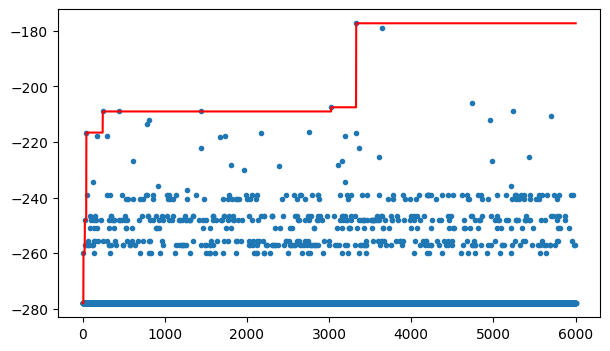

In [39]:
STEEPEST_STEP_CANDIDATES = 3
current_solution = rng.random(NUM_SETS) < 1
ic(fitness(current_solution))
solution_fitness = fitness(current_solution)
history = [float(solution_fitness[1])]
for steps in tqdm(range(2000)):
    candidates = [multiple_mutation(current_solution) for i in range(0, STEEPEST_STEP_CANDIDATES)]
    candidates_fitness = list()
    for c in candidates:
        f = fitness(c)
        history.append(float(f[1]))
        candidates_fitness.append(f)
    idx = candidates_fitness.index(max(candidates_fitness))
    new_solution = candidates[idx]
    new_fitness = candidates_fitness[idx]

    if new_fitness > solution_fitness:
        current_solution = new_solution
        solution_fitness = new_fitness
ic(fitness(current_solution))
plt.figure(figsize=(7, 4))
plt.plot(range(len(history)), list(accumulate(history, max)), color="red")
_ = plt.scatter(range(len(history)), history, marker=".")

# Instance 2

In [25]:
#Initialization
UNIVERSE_SIZE = 1_000
NUM_SETS = 100
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))
SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

ic| fitness(current_solution): (np.True_, np.float64(-33803.842082337665))


  0%|          | 0/2000 [00:00<?, ?it/s]

ic| fitness(current_solution): (np.True_, np.float64(-6941.797572269721))


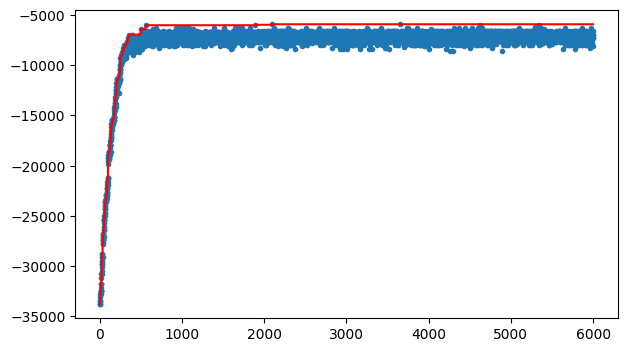

In [23]:
STEEPEST_STEP_CANDIDATES = 3
current_solution = rng.random(NUM_SETS) < 1
ic(fitness(current_solution))
solution_fitness = fitness(current_solution)
history = [float(solution_fitness[1])]
for steps in tqdm(range(2000)):
    candidates = [multiple_mutation(current_solution) for i in range(0, STEEPEST_STEP_CANDIDATES)]
    candidates_fitness = list()
    for c in candidates:
        f = fitness(c)
        history.append(float(f[1]))
        candidates_fitness.append(f)
    idx = candidates_fitness.index(max(candidates_fitness))
    new_solution = candidates[idx]
    new_fitness = candidates_fitness[idx]

    if new_fitness > solution_fitness:
        current_solution = new_solution
        solution_fitness = new_fitness
ic(fitness(current_solution))
plt.figure(figsize=(7, 4))
plt.plot(range(len(history)), list(accumulate(history, max)), color="red")
_ = plt.scatter(range(len(history)), history, marker=".")

# Instance 3

In [28]:
#Initialization
UNIVERSE_SIZE = 10_000
NUM_SETS = 1_000
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))
SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

ic| fitness(current_solution): (np.True_, np.float64(-4272812.596313826))


  0%|          | 0/2000 [00:00<?, ?it/s]

ic| fitness(current_solution): (np.True_, np.float64(-650134.9058208608))


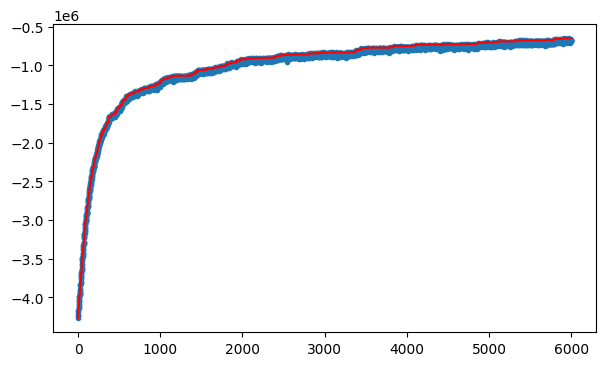

In [29]:
STEEPEST_STEP_CANDIDATES = 3
current_solution = rng.random(NUM_SETS) < 1
ic(fitness(current_solution))
solution_fitness = fitness(current_solution)
history = [float(solution_fitness[1])]
for steps in tqdm(range(2000)):
    candidates = [multiple_mutation(current_solution) for i in range(0, STEEPEST_STEP_CANDIDATES)]
    candidates_fitness = list()
    for c in candidates:
        f = fitness(c)
        history.append(float(f[1]))
        candidates_fitness.append(f)
    idx = candidates_fitness.index(max(candidates_fitness))
    new_solution = candidates[idx]
    new_fitness = candidates_fitness[idx]

    if new_fitness > solution_fitness:
        current_solution = new_solution
        solution_fitness = new_fitness
ic(fitness(current_solution))
plt.figure(figsize=(7, 4))
plt.plot(range(len(history)), list(accumulate(history, max)), color="red")
_ = plt.scatter(range(len(history)), history, marker=".")

# Instance 4

In [33]:
#Initialization
UNIVERSE_SIZE = 100_000
NUM_SETS = 10_000
DENSITY = 0.1

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))
SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

ic| fitness(current_solution): (np.True_, np.float64(-251207507.3061667))


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| fitness(current_solution): (np.True_, np.float64(-101783208.11005403))


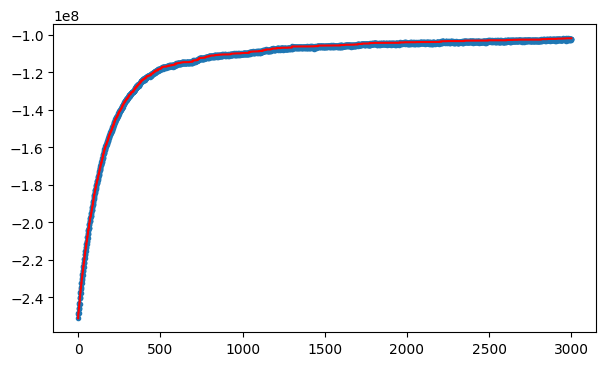

In [34]:
STEEPEST_STEP_CANDIDATES = 3
current_solution = rng.random(NUM_SETS) < 1
ic(fitness(current_solution))
solution_fitness = fitness(current_solution)
history = [float(solution_fitness[1])]
for steps in tqdm(range(1000)):
    candidates = [multiple_mutation(current_solution) for i in range(0, STEEPEST_STEP_CANDIDATES)]
    candidates_fitness = list()
    for c in candidates:
        f = fitness(c)
        history.append(float(f[1]))
        candidates_fitness.append(f)
    idx = candidates_fitness.index(max(candidates_fitness))
    new_solution = candidates[idx]
    new_fitness = candidates_fitness[idx]

    if new_fitness > solution_fitness:
        current_solution = new_solution
        solution_fitness = new_fitness
ic(fitness(current_solution))
plt.figure(figsize=(7, 4))
plt.plot(range(len(history)), list(accumulate(history, max)), color="red")
_ = plt.scatter(range(len(history)), history, marker=".")

# Instance 5

In [40]:
#Initialization
UNIVERSE_SIZE = 100_000
NUM_SETS = 10_000
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))
SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

ic| fitness(current_solution): (np.True_, np.float64(-538438655.8886418))


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| fitness(current_solution): (np.True_, np.float64(-212517143.14471543))


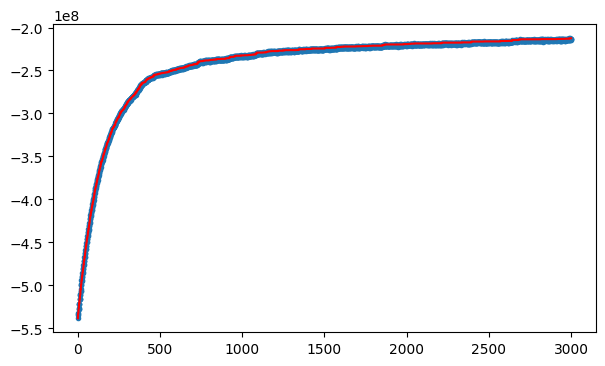

In [41]:
STEEPEST_STEP_CANDIDATES = 3
current_solution = rng.random(NUM_SETS) < 1
ic(fitness(current_solution))
solution_fitness = fitness(current_solution)
history = [float(solution_fitness[1])]
for steps in tqdm(range(1000)):
    candidates = [multiple_mutation(current_solution) for i in range(0, STEEPEST_STEP_CANDIDATES)]
    candidates_fitness = list()
    for c in candidates:
        f = fitness(c)
        history.append(float(f[1]))
        candidates_fitness.append(f)
    idx = candidates_fitness.index(max(candidates_fitness))
    new_solution = candidates[idx]
    new_fitness = candidates_fitness[idx]

    if new_fitness > solution_fitness:
        current_solution = new_solution
        solution_fitness = new_fitness
ic(fitness(current_solution))
plt.figure(figsize=(7, 4))
plt.plot(range(len(history)), list(accumulate(history, max)), color="red")
_ = plt.scatter(range(len(history)), history, marker=".")

# Instance 6

In [42]:
#Initialization
UNIVERSE_SIZE = 100_000
NUM_SETS = 10_000
DENSITY = 0.3

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))
SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

ic| fitness(current_solution): (np.True_, np.float64(-841039291.3079833))


  0%|          | 0/1000 [00:00<?, ?it/s]

ic| fitness(current_solution): (np.True_, np.float64(-333777635.8396112))


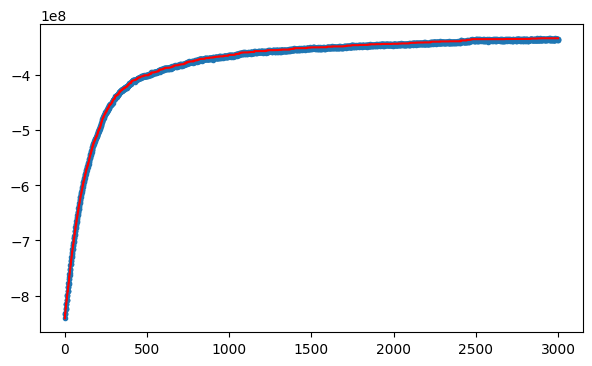

In [43]:
STEEPEST_STEP_CANDIDATES = 3
current_solution = rng.random(NUM_SETS) < 1
ic(fitness(current_solution))
solution_fitness = fitness(current_solution)
history = [float(solution_fitness[1])]
for steps in tqdm(range(1000)):
    candidates = [multiple_mutation(current_solution) for i in range(0, STEEPEST_STEP_CANDIDATES)]
    candidates_fitness = list()
    for c in candidates:
        f = fitness(c)
        history.append(float(f[1]))
        candidates_fitness.append(f)
    idx = candidates_fitness.index(max(candidates_fitness))
    new_solution = candidates[idx]
    new_fitness = candidates_fitness[idx]

    if new_fitness > solution_fitness:
        current_solution = new_solution
        solution_fitness = new_fitness
ic(fitness(current_solution))
plt.figure(figsize=(7, 4))
plt.plot(range(len(history)), list(accumulate(history, max)), color="red")
_ = plt.scatter(range(len(history)), history, marker=".")

# Sources
- prof example of HC (1-max, multiple-knapsack, set-cover)
- slides
- wikipedia (https://en.wikipedia.org/wiki/Set_cover_problem)